**Group 7 (Section 009)**
=

*delete this cell before handing in*

maximum of **2000 words** (excluding citations) using Jupyter. 
The report should include the posed question, conducted analysis, and derived conclusion.
It is not required to include all tasks completed by every group member in their individual assignments; tailor the final report to the collective group's work. 
Make sure to reach a consensus among all team members on the final content of the report.

**Due date: Saturday December 6, 11:59 PM**

# **Title: Predicting Subscription Status in Minecraft - The Roles of Age and Playtime** 

## **Introduction:**

**Background information:** 
- Frank Wood, an associate professor of computer science at UBC, is leading a research group in learning about players' actions in a MineCraft server that they have created. 

**Questions:**
- One question they asked was: **"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"**
- Our group is interested in answering the following question: **"Can the number of hours the players spend on the server (played_hours) and the age of the player (Age) predict if a player will subscribe (subscribe) to a game-related newletter based on the players.csv dataset?"**

**Dataset description:**
- We will be using the players.csv dataset.
- There are 196 observations in this dataset.
- The dataset contains the following variables: **experience** (one of Amateur, Regular, Pro, Veteran), **subscribe** (whether or not a player subsribes to the newsletter), **hashedEmail** (player email), **played_hours** (hours player spent on the MineCraft server), **name** (player name), **gender** (one of Male, Female, Non-binary, Agender, Two-Spirited, Prefer not to say), **Age** (player age).
- We will be focusing on the following variables for our analysis: **Age**, **played_hours**, **subscribe**.

## **Methods & Results:**

*delete the below before handing in*

describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
- loads data 
- wrangles and cleans the data to the format necessary for the planned analysis
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
- performs the data analysis
- creates a visualization of the analysis 
- note: all figures should have a figure number and a legend

Load Data 
-

In [1]:
# Loading the dataset
library(tidyverse)
library(repr)
library(tidymodels)

url_players = "https://raw.githubusercontent.com/ilin27/project_planning_stage_individual/refs/heads/main/players.csv"

### Need to ask about this since TA said not good to use download.file and to use read_csv instead
download.file(url_players, "players.csv")
players <- read_csv("players.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Wrangling and cleaning the data
-

In [2]:
players <- players |>
    select(-experience, -hashedEmail, -name, -gender) |>
    mutate(
        subscribe = as.factor(subscribe),   
        played_hours = as.numeric(played_hours),  
        Age = as.numeric(Age)
    )
head(players)

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


In [3]:
# players <- players %>% select(-experience, -hashedEmail, -name, -gender) |>
#   mutate(
#     subscribe = as.factor(subscribe),     
#     played_hours = as.numeric(played_hours),  
#     Age = as.numeric(Age)                 
#   )
# head(players)

The quantitative variables "Age" and "played_hours" will be used to predict a gamer's subscription status as one of the two categories: "TRUE" or "FALSE", using K-NN classification. Therefore, the dataframe above is simplified to only include the two predictor variables and the reponse variable in question. 

In [4]:
# Checking for NA values
nrow(filter(players, is.na(Age)))
nrow(filter(players, is.na(played_hours)))

[1] 2

[1] 0

There are missing Age values, so we will remove them.

In [5]:
clean_players <- players |>
    filter(!is.na(Age))

Summary of Dataset
-

In [6]:
summary(players)

 subscribe    played_hours          Age       
 FALSE: 52   Min.   :  0.000   Min.   : 9.00  
 TRUE :144   1st Qu.:  0.000   1st Qu.:17.00  
             Median :  0.100   Median :19.00  
             Mean   :  5.846   Mean   :21.14  
             3rd Qu.:  0.600   3rd Qu.:22.75  
             Max.   :223.100   Max.   :58.00  
                               NA's   :2      

**Table 1: mean, median, mode of Age and played_hours**

|              | mean   | median |
|---|---|---|
| played_hours | 5.846  | 0.100  |
| Age          | 21.14  | 19.00  |

Exploratory Data Visualizations
-

#### **Graph 1: Age vs Hours Played with Subscription Status**

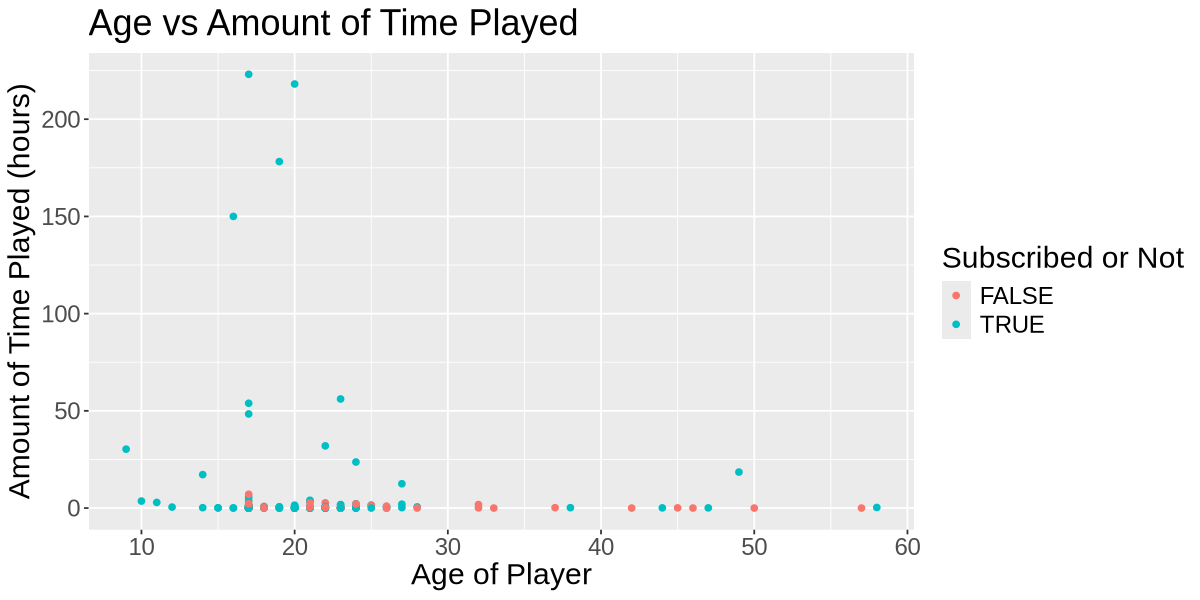

In [7]:
options(repr.plot.width = 10, repr.plot.height = 5)

players_scatter_plot <- ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) + 
    geom_point(na.rm = TRUE) + 
    labs(x = "Age of Player",
         y = "Amount of Time Played (hours)",
         color = "Subscribed or Not",
         title = "Age vs Amount of Time Played") +
    theme(text = element_text(size = 18))
players_scatter_plot

- Most of the points are near the bottom of the graph.

Let's focus on each individual variable for the next few graphs.

#### **Graph 2: Subscription Status Visual**

0.7
1.9


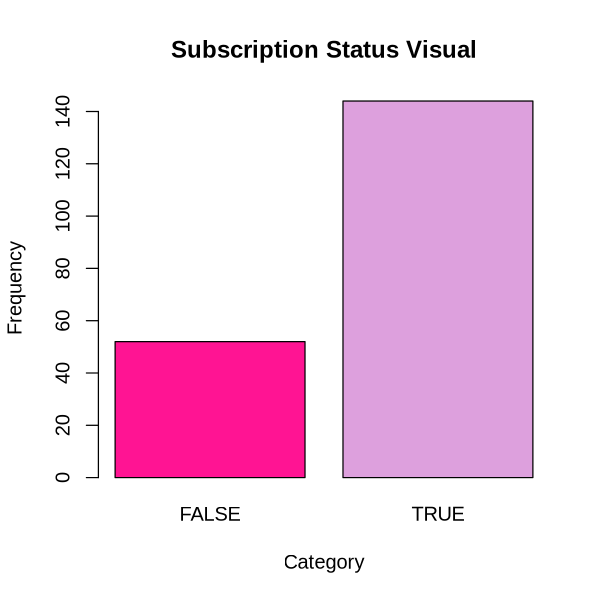

In [8]:
counts <- table(players$'subscribe')
bar_colors <- c("deeppink", "plum")

options(repr.plot.width = 5, repr.plot.height = 5)

subscription_status_visual <- barplot(
  counts,
  main = "Subscription Status Visual",
  xlab = "Category",
  ylab = "Frequency",
  col = bar_colors,
  ylim = c(0, max(counts) + 1)
)
subscription_status_visual

#### **Graph 3: Histogram of Hours Played**

In [9]:
range(players$`played_hours`, na.rm = TRUE)

[1]   0.0 223.1

$breaks
  [1]   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
 [19]  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
 [37]  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
 [55]  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
 [73]  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
 [91]  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
[109] 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
[127] 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
[145] 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
[163] 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
[181] 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
[199] 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
[217] 216 217 218 219 220 221 222 223 224

$counts
  [1]

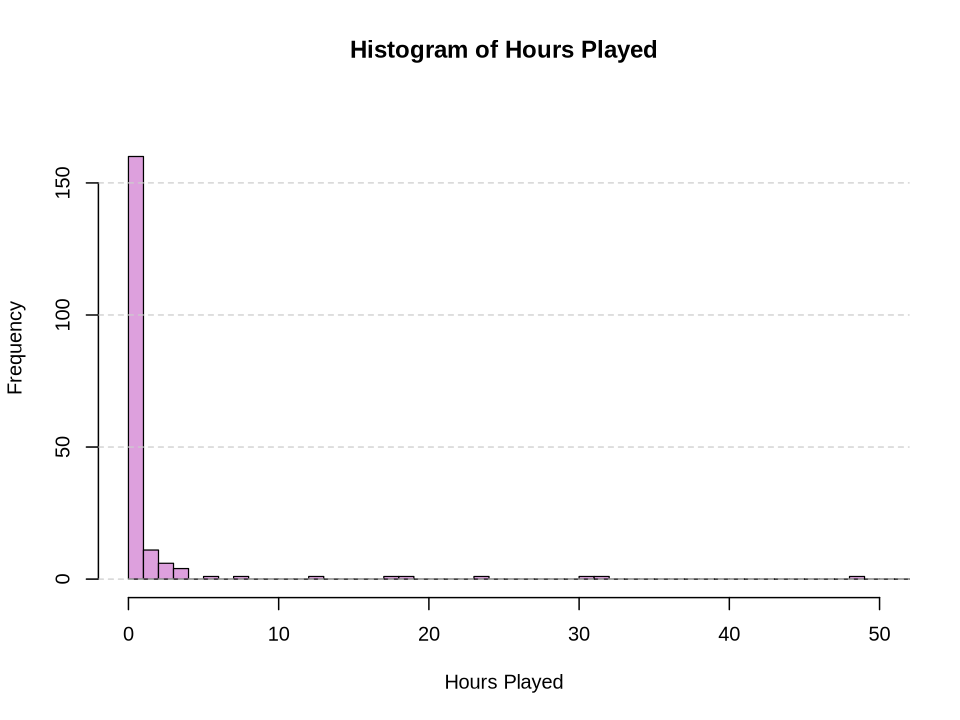

In [10]:
options(repr.plot.width = 8, repr.plot.height = 6)

hours_played_visual <- hist(
  players$`played_hours`,
  breaks = seq(0, 224, by = 1),   
  main = "Histogram of Hours Played",
  xlab = "Hours Played",
  ylab = "Frequency",
  col = "plum",
  border = "black",
  lwd = 1.2,
  xlim = c(0, 50),                
  ylim = c(0, 175)                 
)


abline(h = seq(0, 300, 50), col = "gray80", lty = 2)


hours_played_visual

Most of the observations in the Histogram of Hours Played are in the first four bins that each have a one hour range between bins. 

The histogram below was created to zoom in on where the majority of the observations lie for a different perspective. 

#### **Graph 4: Histogram of Hours Played (0 to 4)**

$breaks
 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
[20] 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0 3.1 3.2 3.3 3.4 3.5 3.6 3.7
[39] 3.8 3.9 4.0

$counts
 [1] 119  10   5   5   4   5   3   2   1   6   1   2   0   1   2   1   1   2   0
[20]   1   1   1   1   0   0   0   2   0   1   0   0   0   0   0   1   1   0   1
[39]   0   1

$density
 [1] 6.57458564 0.55248619 0.27624309 0.27624309 0.22099448 0.27624309
 [7] 0.16574586 0.11049724 0.05524862 0.33149171 0.05524862 0.11049724
[13] 0.00000000 0.05524862 0.11049724 0.05524862 0.05524862 0.11049724
[19] 0.00000000 0.05524862 0.05524862 0.05524862 0.05524862 0.00000000
[25] 0.00000000 0.00000000 0.11049724 0.00000000 0.05524862 0.00000000
[31] 0.00000000 0.00000000 0.00000000 0.00000000 0.05524862 0.05524862
[37] 0.00000000 0.05524862 0.00000000 0.05524862

$mids
 [1] 0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45
[16] 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.

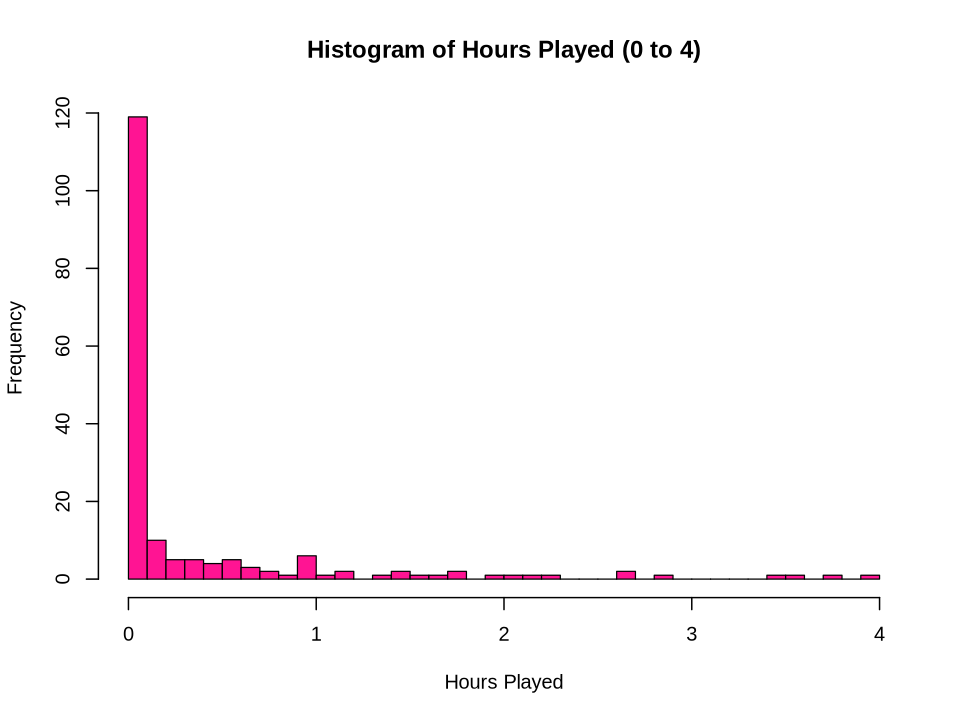

In [11]:
zoom_in_data_filter <- players$`played_hours`[
  players$`played_hours` >= 0 &
  players$`played_hours` <= 4
]


histogram_zoomed <- hist(
  zoom_in_data_filter,
  breaks = seq(0, 4, by = 0.1),
  main = "Histogram of Hours Played (0 to 4)",
  xlab = "Hours Played",
  ylab = "Frequency",
  col = "deeppink",
  border = "black",
  lwd = 1.2,
  xlim = c(0, 4)
)
histogram_zoomed

#### **Graph 5: Age by Subscription Status**

17.0,10
17.0,17
21.0,19
24.5,22
33.0,28
19.3567,18.33705
22.6433,19.66295


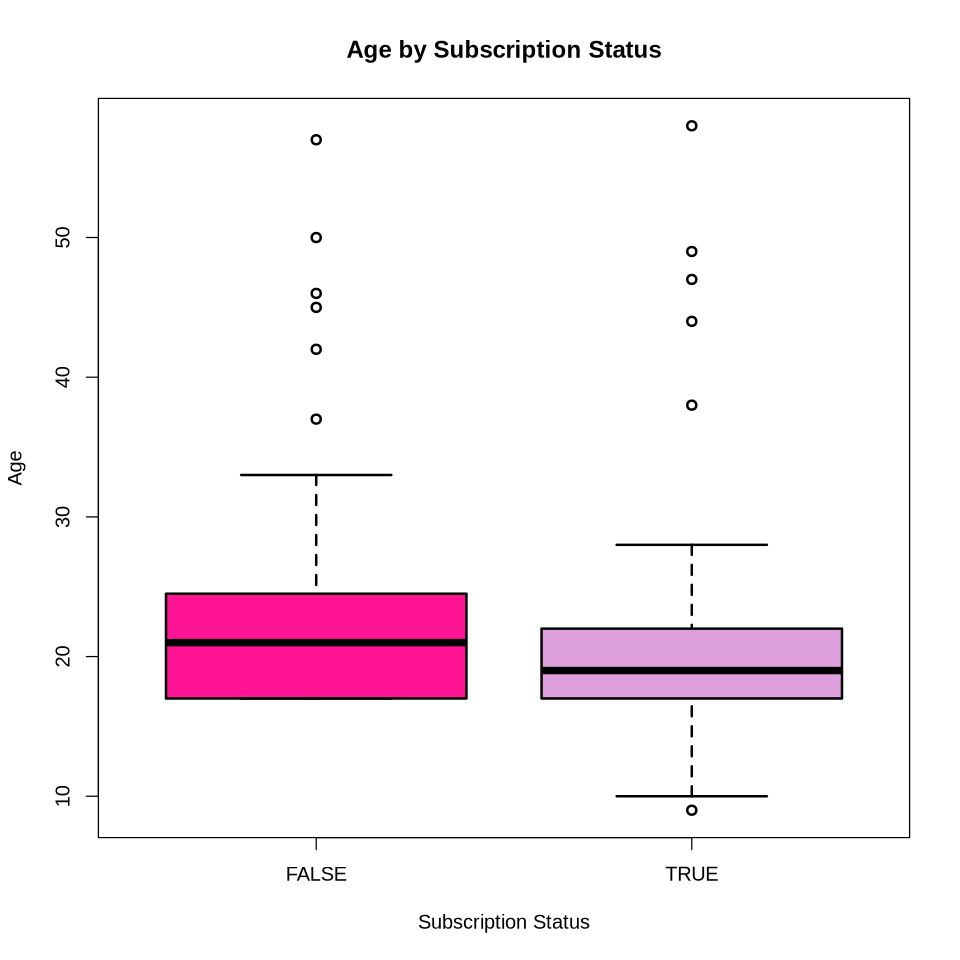

In [12]:
options(repr.plot.width = 8, repr.plot.height = 8)

box_plot_age_sub <- boxplot(
  players$Age ~ players$`subscribe`,
  main = "Age by Subscription Status",
  xlab = "Subscription Status",
  ylab = "Age",
  col = c("deeppink", "plum"),   
  border = "black",
  lwd = 2
)
box_plot_age_sub

Notes:
- 

#### **Graph 6: Distribution of Player Age with Subscription Proportions**

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


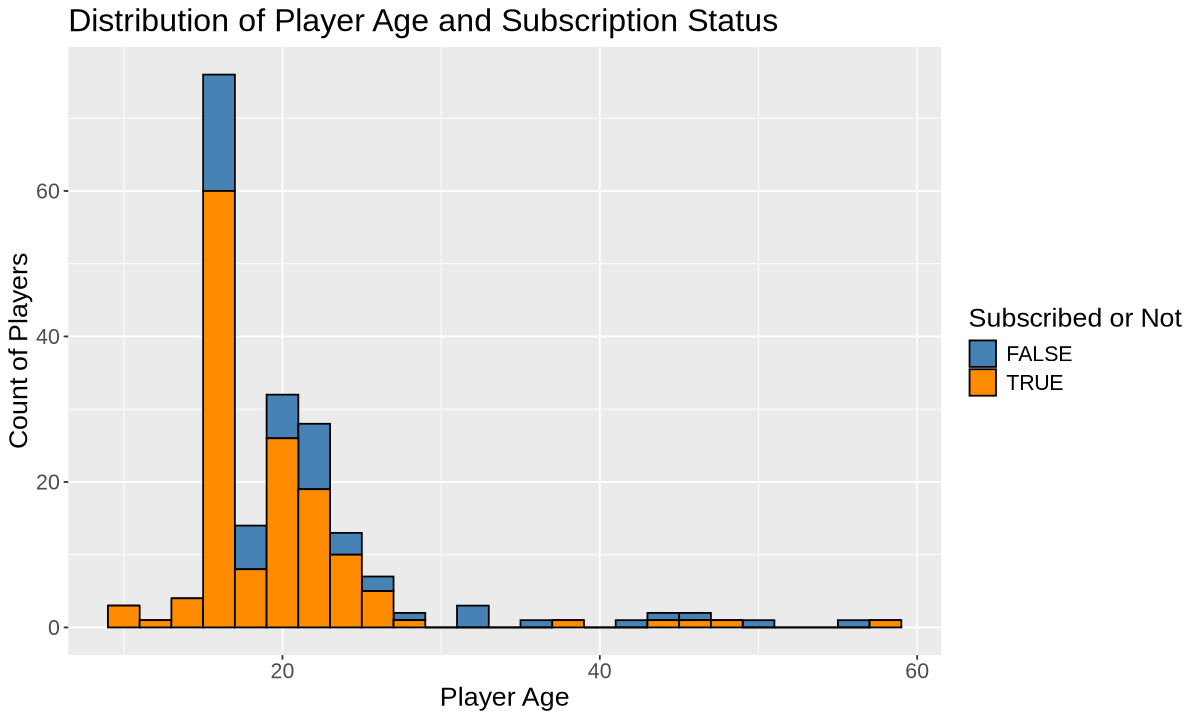

In [13]:
# Graph 5: Distribution of Player Age and Subscription Proportions

options(repr.plot.width = 10, repr.plot.height = 6)

players_hist <- ggplot(players, aes(x = Age, fill = subscribe)) +
    geom_histogram(binwidth = 2, color = "black") + 
    labs(x = "Player Age", 
         y = "Count of Players", 
         fill = "Subscribed or Not", 
         title = "Distribution of Player Age and Subscription Status") +
    scale_fill_manual(values = c("steelblue", "darkorange")) +
    theme(text = element_text(size = 16))

players_hist 

#### **Graph 7: Log transformations**

The following graph was created to further explore Graph 1, since there most of the points are gathered at 

Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_qq()`).”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_qq_line()`).”


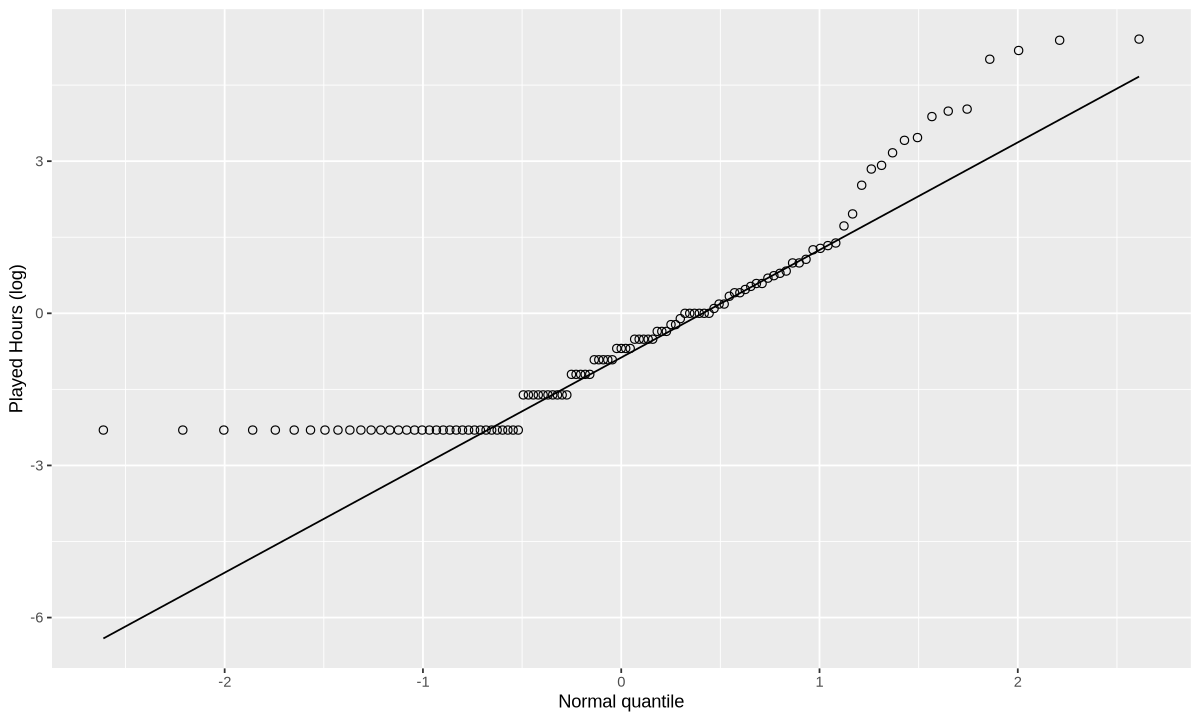

In [14]:
# log transformations
library(dplyr)

log_players <- players |>
    mutate(log_played_hours = log(played_hours))

log_players_plot <- log_players |>
    ggplot(aes(sample = log_played_hours)) +  
    stat_qq(shape = 1, size = 2) +
    stat_qq_line() +
    labs(x = "Normal quantile", 
         y = "Played Hours (log)")
log_players_plot

In [15]:
Notes:
- 

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: Notes:
2: - 
  ^


# Data Analysis (K-NN classification)

In [ ]:
# recipe
# players_recipe <- recipe(Class ~ ., data = clean_players)

In [ ]:
# standardize/scale data for KNN
# players_recipe <- players_recipes |>
#   step_scale(all_predictors()) |>
#   step_center(all_predictors())
# players_recipe

**Discussion:**
-
- summarize what you found
- discuss whether this is what you expected to find
- discuss what impact could such findings have
- discuss what future questions could this lead to

**References**
-
- You may include references if necessary, as long as they all have a consistent citation style.
- Hint: use your proposal as a basis for your final report!
- https://ubco-biology.github.io/BIOL202/transform.html